In [1]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_sroy_gt
import scanpy as sc
from grnndata import GRNAnnData, read_h5ad, from_anndata


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3, compute_scenic
from grnndata import utils as grnutils

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
2024-05-09 15:05:24,356:INFO - Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
2024-05-09 15:05:24,480:INFO - Downloading data from `https://omnipathdb.org/queries/interactions?format=json`
2024-05-09 15:05:24,571:INFO - Downloading data from `https://omnipathdb.org/queries/complexes?format=json`
2024-05-09 15:05:24,660:INFO - Downloading data from `https://omnipathdb.org/queries/annotations?format=json`
2024-05-09 15:05:24,749:INFO - Downloading data from `https://omnipathdb.org/queries/intercell?format=json`
2024-05-09 15:05:24,935:INFO - Downloading data from `https://omnipathdb.org/about?format=text`
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/arboreto/core.py:12: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask D

In [2]:
model = scPrint.load_from_checkpoint('../../data/temp/vbd8bavn/epoch=17-step=90000.ckpt', precpt_gene_emb = None)#'../../data/main/gene_embeddings.parquet')


In [3]:
preprocessor = Preprocessor(is_symbol=True, force_preprocess=True, skip_validate=True, do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)
res = {}

## do all GRNs

In [4]:
preadata = get_sroy_gt(get="chen", species="human", gt="full")
adata = preprocessor(preadata.copy())

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
 KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 385 renamining
filtered out 0 cells, 385 renamining
Removed 0 genes.
startin QC
Seeing 38 outliers (9.87% of total dataset):
done


In [5]:
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"]=True

## chen / all

/tmp/ipykernel_538370/1455916061.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 6519


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:265: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 1904 ...
doing regression....
metrics {'used_heads': 9, 'precision': 0.0, 'random_precision': 0.0007269748757980852, 'recall': 0.0, 'predicted_true': 157.0, 'number_of_true': 1168.0, 'epr': 8.331573586285844}


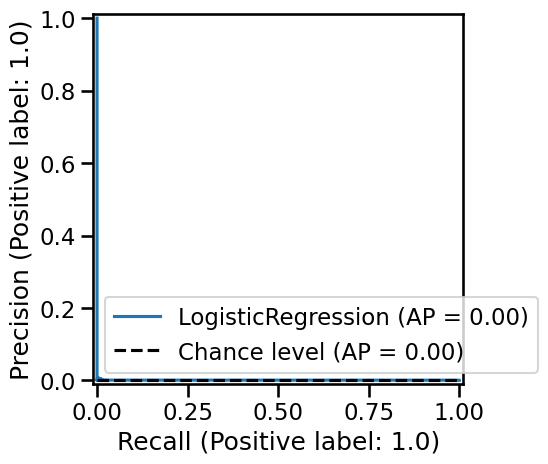

In [6]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn, m = train_classifier(grn, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = make_index_unique(grn.var['symbol'].astype(str))

precision:  0.03335318642048839 
recall:  1.0 
random precision: 0.033373063170441


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 17422.01it/s]


Area Under Precision-Recall Curve (AUPRC):  0.10178817905345747
EPR: 6.416930737890448


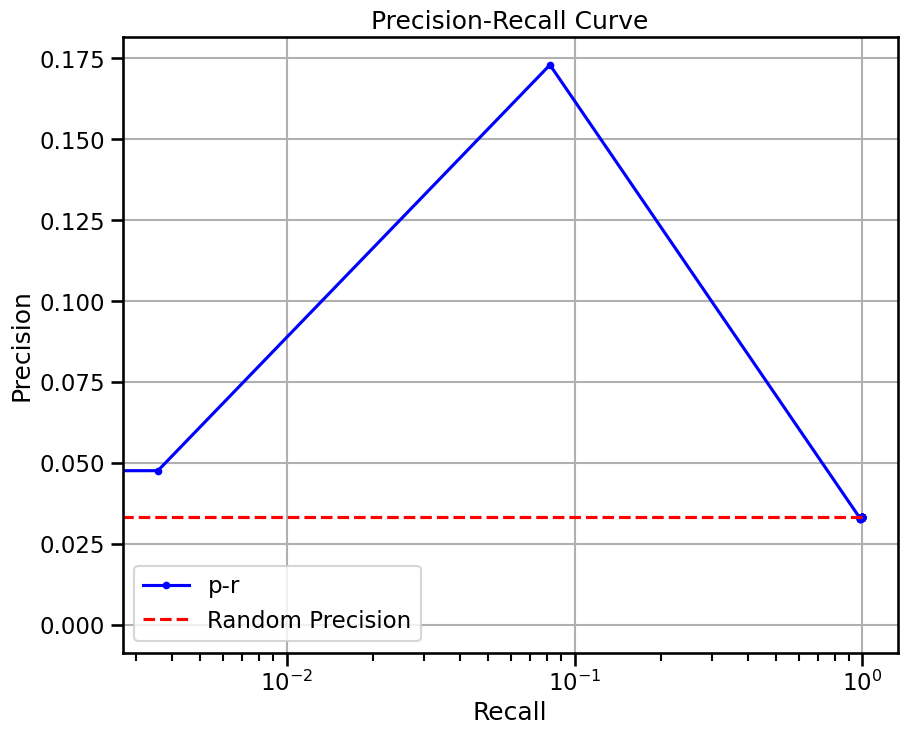

{'precision': 0.03335318642048839,
 'recall': 1.0,
 'rand_precision': 0.033373063170441,
 'auprc': 0.10178817905345747,
 'EPR': 6.416930737890448}

In [7]:
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

## chen / chip

/tmp/ipykernel_518727/1455916061.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 6519


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:265: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 1904 ...
doing regression....
metrics {'used_heads': 9, 'precision': 0.0, 'random_precision': 0.0007269748757980852, 'recall': 0.0, 'predicted_true': 157.0, 'number_of_true': 1168.0, 'epr': 8.331573586285844}


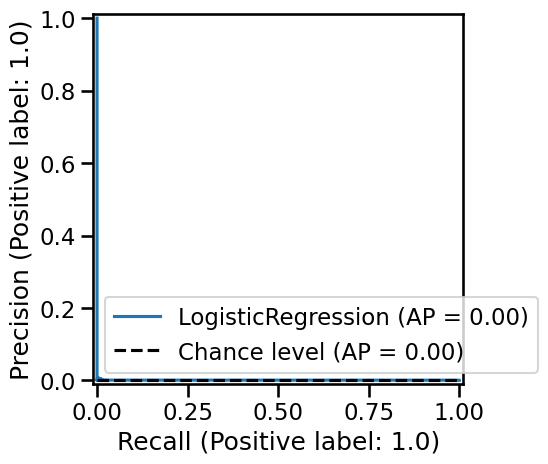

In [5]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn, m = train_classifier(grn, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = make_index_unique(grn.var['symbol'].astype(str))

In [8]:
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))

precision:  0.2848719475878499 
recall:  1.0 
random precision: 0.285041716328963


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 2382.50it/s]


Area Under Precision-Recall Curve (AUPRC):  0.32475222054188424
EPR: 1.7991819424073254


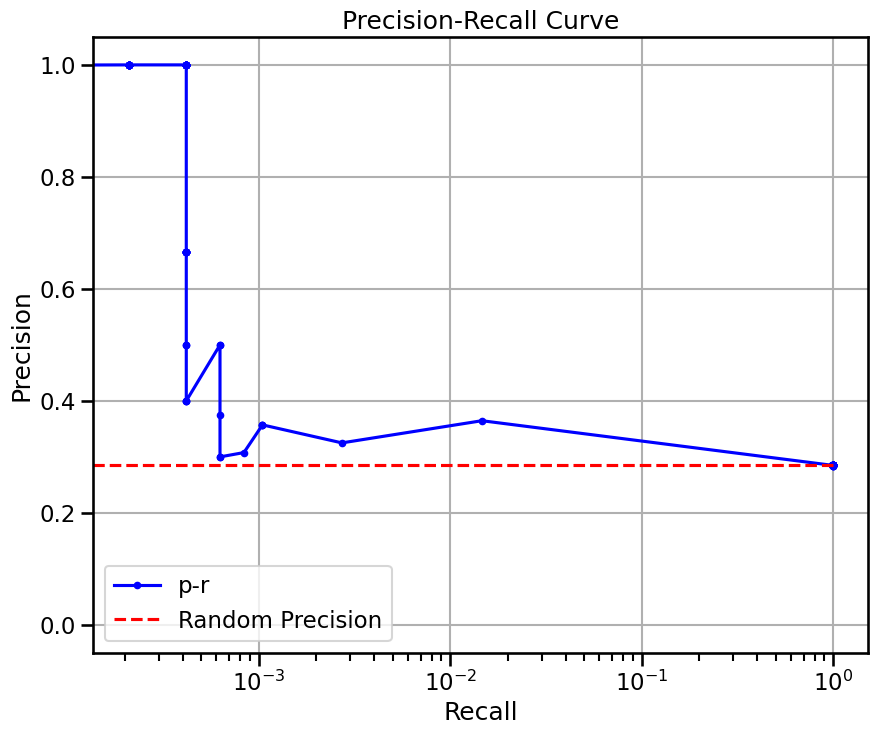

{'precision': 0.2848719475878499,
 'recall': 1.0,
 'rand_precision': 0.285041716328963,
 'auprc': 0.32475222054188424,
 'EPR': 1.7991819424073254}

In [9]:
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)